In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
input_dir = '/project/gca/yuzhao1/work/final_GCArna/preprocessing/'
output_doubletscore_path = '/project/gca/yuzhao1/work/final_GCArna/preprocessing/doublet_scores/'
meta_sampleID_path = '/project/gca/yuzhao1/work/final_GCArna/metadata/SampleIDs.csv'
meta_sampleID = pd.read_csv(meta_sampleID_path)

In [4]:
meta_sampleID

,SampleID
0,HA01-AC
1,HA01-TI
2,HA02-AC
3,HA02-TI
4,HA04-AC
...,...
75,HA79TI-ad
76,HA79TI-inf
77,OR07-TI
78,OR95AC


In [12]:
# loop index i for samples
for i in range(0,80):
    counts_matrix_path = input_dir + 'matrix_removedAmbientRNA/' + meta_sampleID['SampleID'][i] + '.mtx'
    gene_path = input_dir + 'gene_removedAmbientRNA/' + meta_sampleID['SampleID'][i] + '.tsv'
    
    #Load the raw counts matrix as a scipy sparse matrix with cells as rows and genes as columns.
    counts_matrix = scipy.io.mmread(counts_matrix_path).T.tocsc()
    genes = np.array(scr.load_genes(gene_path, delimiter='\t', column=0))
    
    # expected_doublet_rate: the expected fraction of transcriptomes that are doublets, typically 0.05-0.1. 
    # Results are not particularly sensitive to this parameter.
    scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
    
    # Run the default pipeline
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
    # save doublet score to a folder, named by each sample
    i_doubletscore_path = output_doubletscore_path + meta_sampleID['SampleID'][i] + '.csv'
    np.savetxt(i_doubletscore_path, doublet_scores, delimiter=",")



Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 29.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.7%
Elapsed time: 6.9 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 28.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.2%
Elapsed time: 4.7 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.6%
Elapsed time: 9.4 seconds
Preprocessing...
Simulating doublets..

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 13.5%
Elapsed time: 10.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 17.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.2%
Elapsed time: 7.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 22.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.0%
Elapsed time: 4.6 seconds
Preprocessing...
Simulating doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.0%
Elapsed time: 8.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 26.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.2%
Elapsed time: 7.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.28
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 35.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.5%
Elapsed time: 17.7 seconds
Preprocessing...
Simulating doublets.

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 17.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%
Elapsed time: 4.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 27.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.0%
Elapsed time: 5.5 seconds


In [9]:
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 6628 rows, 36601 columns
Number of genes in gene list: 36601


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


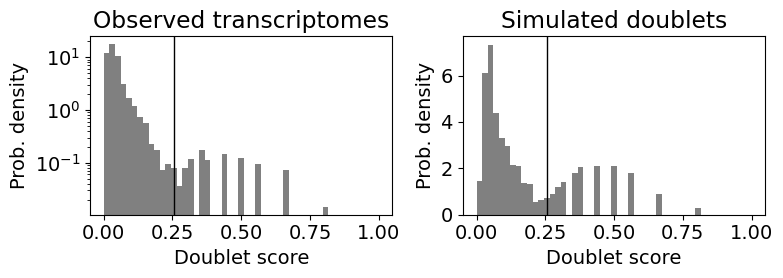

In [11]:
scrub.plot_histogram();